In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 
from warnings import simplefilter

In [2]:
import models
import class_sampling
import train
import metric_utils

In [3]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0.5

ratio = (100, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (6, 8)


simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [4]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             
                            

reduced_train_mnist = class_sampling.Reduce(train_mnist, NUM_CLASSES_REDUCED, nums=nums)
reduced_test_mnist = class_sampling.Reduce(test_mnist, NUM_CLASSES_REDUCED, nums=nums)


reduced_train_mnist_ratio = class_sampling.BinaryRatio(train_mnist, 2, ratio, nums=nums)

In [5]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)


Test set: Avg. loss: 0.022128139716991478, AUC: 0.4259660355034659


Test set: Avg. loss: 0.04033211496799382, AUC: 0.5191803166247272


Test set: Avg. loss: 0.043917573016622795, AUC: 0.5174253985673438


Test set: Avg. loss: 0.04541367872407964, AUC: 0.5122774603147384


Test set: Avg. loss: 0.045970036129526964, AUC: 0.5130174730894703


Test set: Avg. loss: 0.04626579561095307, AUC: 0.5101474452679907


Test set: Avg. loss: 0.046569111431113926, AUC: 0.5094026098176814


Test set: Avg. loss: 0.04679030858705256, AUC: 0.5121338517530962


Test set: Avg. loss: 0.04698643773238852, AUC: 0.5122924641943131


Test set: Avg. loss: 0.04714291337607564, AUC: 0.5139059171014219


Test set: Avg. loss: 0.04730513475943303, AUC: 0.5132066291426783


Test set: Avg. loss: 0.0474383608895059, AUC: 0.5166682385016697


Test set: Avg. loss: 0.04755849423615829, AUC: 0.5177560197708264


Test set: Avg. loss: 0.04762760107068048, AUC: 0.5177067213093671


Test set: Avg. loss: 0.0476365513929916, AUC


Test set: Avg. loss: 0.050109632266974596, AUC: 0.4262361053358082


Test set: Avg. loss: 0.05011276181933796, AUC: 0.42624896580401495


Test set: Avg. loss: 0.05011570577048861, AUC: 0.4262521809210666


Test set: Avg. loss: 0.05011850163556528, AUC: 0.42625325262675057


Test set: Avg. loss: 0.050121151389048955, AUC: 0.42625325262675057


Test set: Avg. loss: 0.05012367280126852, AUC: 0.42671783704072047


Test set: Avg. loss: 0.05012607377014792, AUC: 0.42671890874640434


Test set: Avg. loss: 0.05012837798945899, AUC: 0.42672855409755944


Test set: Avg. loss: 0.050130585459201724, AUC: 0.42718670827742594


Test set: Avg. loss: 0.050132702102819095, AUC: 0.42810194493147513


Test set: Avg. loss: 0.050134743716158975, AUC: 0.42902039670257597


Test set: Avg. loss: 0.05013670437577842, AUC: 0.42902468352531153


Test set: Avg. loss: 0.050138605800968274, AUC: 0.42902254011394375


Test set: Avg. loss: 0.05014626876167629, AUC: 0.42864583556605357


Test set: Avg. loss: 0.050148


Test set: Avg. loss: 0.0027396120516656594, AUC: 0.9827830481881744


Test set: Avg. loss: 0.0027421110658665377, AUC: 0.982840920295105


Test set: Avg. loss: 0.0027416843928658938, AUC: 0.9828800375525673


Test set: Avg. loss: 0.002755345456595253, AUC: 0.9829304077197104


Test set: Avg. loss: 0.002754001513771389, AUC: 0.9829952459135861


Test set: Avg. loss: 0.00274894030197807, AUC: 0.983050438756307


Test set: Avg. loss: 0.002740795506206852, AUC: 0.9830884843080854


Test set: Avg. loss: 0.002728406378447886, AUC: 0.9831313525354413


Test set: Avg. loss: 0.0027069938108787773, AUC: 0.9831967265821591


Test set: Avg. loss: 0.002665396679509007, AUC: 0.9833076481204426


Test set: Avg. loss: 0.002642290439171327, AUC: 0.9833907053109446


Test set: Avg. loss: 0.0026244393416813444, AUC: 0.9834694756787112


Test set: Avg. loss: 0.002608017583317885, AUC: 0.9835525328692133


Test set: Avg. loss: 0.0025929158271963304, AUC: 0.9836371976182413


Test set: Avg. loss: 0.0025793


Test set: Avg. loss: 0.04797938250113225, AUC: 0.5184301226459984


Test set: Avg. loss: 0.04798001236056689, AUC: 0.5184408397028374


Test set: Avg. loss: 0.04798063432207759, AUC: 0.5184504850539925


Test set: Avg. loss: 0.047981244436702375, AUC: 0.5184569152880959


Test set: Avg. loss: 0.04798184467892222, AUC: 0.518466560639251


Test set: Avg. loss: 0.04798243899769911, AUC: 0.5184815645188255


Test set: Avg. loss: 0.04798302739303305, AUC: 0.518486923047245


Test set: Avg. loss: 0.047983611839405006, AUC: 0.5184987118097679


Test set: Avg. loss: 0.04798418443889105, AUC: 0.5185062137495552


Test set: Avg. loss: 0.04798474914045314, AUC: 0.5185158591007103


Test set: Avg. loss: 0.04798531186753425, AUC: 0.518520145923446


Test set: Avg. loss: 0.0479858686711724, AUC: 0.5185255044518654


Test set: Avg. loss: 0.047986411653443646, AUC: 0.5185330063916527


Test set: Avg. loss: 0.047986954635714896, AUC: 0.5185372932143882


Test set: Avg. loss: 0.04798749564350515, AUC: 


Test set: Avg. loss: 0.00302380385112565, AUC: 0.9890305564724592


Test set: Avg. loss: 0.003030308161709866, AUC: 0.9890364508537207


Test set: Avg. loss: 0.0030359209941287464, AUC: 0.9890412735292982


Test set: Avg. loss: 0.0030406876380399146, AUC: 0.9890519905861374


Test set: Avg. loss: 0.00304474889861871, AUC: 0.9890552057031889


Test set: Avg. loss: 0.003048245704445533, AUC: 0.9890627076429763


Test set: Avg. loss: 0.00305129023072142, AUC: 0.9890696737299216


Test set: Avg. loss: 0.003053972809951498, AUC: 0.9890707454356056


Test set: Avg. loss: 0.003056356502122267, AUC: 0.9890744964054992


Test set: Avg. loss: 0.0030584927671444342, AUC: 0.9890819983452864


Test set: Avg. loss: 0.0030604210946377267, AUC: 0.989086285168022


Test set: Avg. loss: 0.003018664400523247, AUC: 0.9894367329266568


Test set: Avg. loss: 0.0030202616322361413, AUC: 0.989444770719286


Test set: Avg. loss: 0.0030217249694571486, AUC: 0.9894485216891796


Test set: Avg. loss: 0.003023071


Test set: Avg. loss: 0.004884493400344691, AUC: 0.9836446995580286


Test set: Avg. loss: 0.004884348893017502, AUC: 0.9836511297921318


Test set: Avg. loss: 0.015126606445628417, AUC: 0.8113572938145435


Test set: Avg. loss: 0.016198973231187273, AUC: 0.8358666669524548


Test set: Avg. loss: 0.012961417251492139, AUC: 0.8715266018784856


Test set: Avg. loss: 0.00935599596604057, AUC: 0.9035041560746422


Test set: Avg. loss: 0.007272851639899654, AUC: 0.927861882858282


Test set: Avg. loss: 0.006483518435594705, AUC: 0.9419483823674406


Test set: Avg. loss: 0.005588623430911552, AUC: 0.9533668705765348


Test set: Avg. loss: 0.005146331298425331, AUC: 0.9608607725711935


Test set: Avg. loss: 0.004351531990319799, AUC: 0.9664754386491363


Test set: Avg. loss: 0.004148733912047392, AUC: 0.9700479695464113


Test set: Avg. loss: 0.0038648984447029067, AUC: 0.9726473916827066


Test set: Avg. loss: 0.003834835614230075, AUC: 0.9742131536868819


Test set: Avg. loss: 0.00376448812


Test set: Avg. loss: 0.0036090727178206355, AUC: 0.9804778092621093


Test set: Avg. loss: 0.003442402581990876, AUC: 0.981640609929139


Test set: Avg. loss: 0.003405658601480488, AUC: 0.982292742837791


Test set: Avg. loss: 0.0033142263104456553, AUC: 0.983166182970168


Test set: Avg. loss: 0.0033445080614978484, AUC: 0.9834807285883921


Test set: Avg. loss: 0.0033419317340258486, AUC: 0.9837073943405368


Test set: Avg. loss: 0.00330912042602002, AUC: 0.9839297732699455


Test set: Avg. loss: 0.003264153966252108, AUC: 0.9841585824334578


Test set: Avg. loss: 0.0032141077839316296, AUC: 0.9843638140719243


Test set: Avg. loss: 0.0031673951425414152, AUC: 0.9845910156769109


Test set: Avg. loss: 0.0031433418917606584, AUC: 0.9847474847067599


Test set: Avg. loss: 0.003168526890361778, AUC: 0.9848021416966388


Test set: Avg. loss: 0.00319199149899848, AUC: 0.984820896546107


Test set: Avg. loss: 0.003214320781068032, AUC: 0.9848235758103167


Test set: Avg. loss: 0.003247684


Test set: Avg. loss: 0.04363330698901822, AUC: 0.5959230172373142


Test set: Avg. loss: 0.043633218137373836, AUC: 0.5959530249964633


Test set: Avg. loss: 0.043633158902944245, AUC: 0.5962895405812075


Test set: Avg. loss: 0.04363311743884353, AUC: 0.596621769343216


Test set: Avg. loss: 0.043633103617476625, AUC: 0.5966646375705719


Test set: Avg. loss: 0.04363310164299564, AUC: 0.5966967887410887


Test set: Avg. loss: 0.04363311546436255, AUC: 0.5967235813831862


Test set: Avg. loss: 0.04362731246474367, AUC: 0.5971474409811679


Test set: Avg. loss: 0.04362734405643945, AUC: 0.5971656599777942


Test set: Avg. loss: 0.04362740131638805, AUC: 0.5971935243255755


Test set: Avg. loss: 0.04362745857633666, AUC: 0.5975273606461099


Test set: Avg. loss: 0.04362752965765217, AUC: 0.5975466513484201


Test set: Avg. loss: 0.04362760863689162, AUC: 0.5975766591075693


Test set: Avg. loss: 0.04362769353957403, AUC: 0.5975916629871438


Test set: Avg. loss: 0.04362778634018039, AUC

KeyboardInterrupt: 

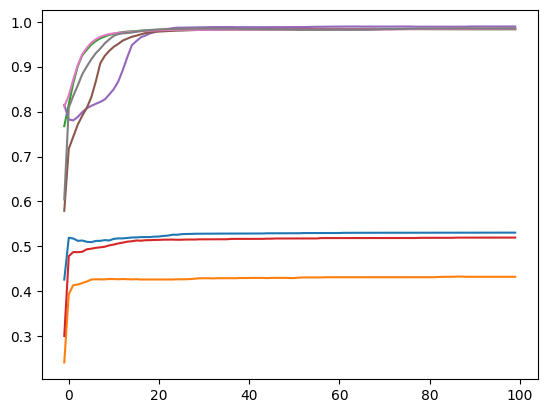

In [6]:
# SIGMOID 2 CLASS RATIO 

learning_rates = [1e-5, 1e-6, 1e-7]

n_epochs = 100

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()


Test set: Avg. loss: 0.020422892047258143, AUC: 0.48866349727572417


Test set: Avg. loss: 94.77835468426501, AUC: 0.5005219206680585


Test set: Avg. loss: 4.119651462720788, AUC: 0.9610617173869243


Test set: Avg. loss: 5.681824867769798, AUC: 0.9506586703133239


Test set: Avg. loss: 5.894738870624677, AUC: 0.9486052822229747


Test set: Avg. loss: 7.154787430852096, AUC: 0.9347449126131184


Test set: Avg. loss: 8.189647982579581, AUC: 0.9239903460751995


Test set: Avg. loss: 8.381907713832815, AUC: 0.9219283843393792


Test set: Avg. loss: 7.68438480606237, AUC: 0.9270704282107232


Test set: Avg. loss: 7.02172649375647, AUC: 0.9316819777685373


Test set: Avg. loss: 6.737649921551501, AUC: 0.9337353658588864


Test set: Avg. loss: 6.3144725854846016, AUC: 0.9373287950169973


Test set: Avg. loss: 6.574415882181677, AUC: 0.9352754069266482


Test set: Avg. loss: 4.91912070959498, AUC: 0.948613855868446


Test set: Avg. loss: 5.734696603463056, AUC: 0.9398955301299337


Test set


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.313691638764881, AUC: 0.928619042923956


Test set: Avg. loss: 8.3


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set: Avg. loss: 7.035668288205228, AUC: 0.9342658601724161


Test set:


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.498904399990295, AUC: 0.938364062707643


Test set: Avg. loss: 7.4


Test set: Avg. loss: 7.757228685461956, AUC: 0.9358059012401778


Test set: Avg. loss: 7.757228685461956, AUC: 0.9358059012401778


Test set: Avg. loss: 7.757228685461956, AUC: 0.9358059012401778


Test set: Avg. loss: 0.030464108192649195, AUC: 0.3528451642496131


Test set: Avg. loss: 27.6263839690088, AUC: 0.75


Test set: Avg. loss: 6.368978622784032, AUC: 0.9526777638217883


Test set: Avg. loss: 6.383018983323629, AUC: 0.9537216051579052


Test set: Avg. loss: 7.121736198725414, AUC: 0.946560467778097


Test set: Avg. loss: 9.222588264670678, AUC: 0.9322038984365958


Test set: Avg. loss: 8.718940055641822, AUC: 0.9332305924817703


Test set: Avg. loss: 7.759187117866848, AUC: 0.9393821831073463


Test set: Avg. loss: 9.107215391676371, AUC: 0.9286104692784849


Test set: Avg. loss: 8.309435605509188, AUC: 0.9337439395043577


Test set: Avg. loss: 6.710920061383929, AUC: 0.9460642680464522


Test set: Avg. loss: 6.933741346402692, AUC: 0.9440108799561029


Test set: Avg. loss: 7


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set: Avg. loss: 8.734217041521092, AUC: 0.9281056959013688


Test set:


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set: Avg. loss: 5.946198962983631, AUC: 0.9234769990526122


Test set:


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set: Avg. loss: 7.683429725915502, AUC: 0.9332391661272416


Test set:


Test set: Avg. loss: 8.149404711358049, AUC: 0.928619042923956


Test set: Avg. loss: 8.149404711358049, AUC: 0.928619042923956


Test set: Avg. loss: 8.149404711358049, AUC: 0.928619042923956



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 8.149404711358049, AUC: 0.928619042923956



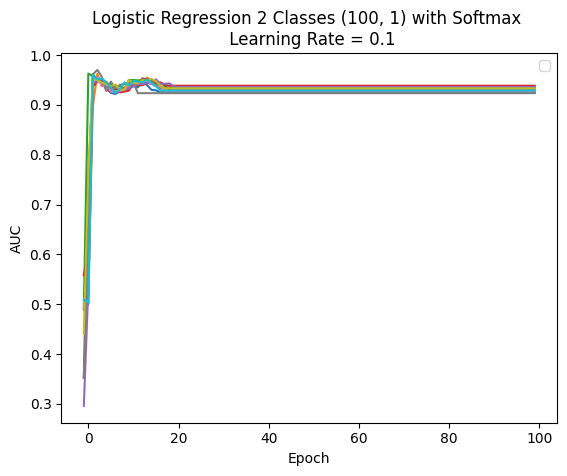


Test set: Avg. loss: 0.031180436073129467, AUC: 0.46544713704543605


Test set: Avg. loss: 10.725756785390788, AUC: 0.5


Test set: Avg. loss: 1.3297071753081329, AUC: 0.8977206963514852


Test set: Avg. loss: 0.6240366112371409, AUC: 0.9542520994714346


Test set: Avg. loss: 0.8042642976433101, AUC: 0.9445242269786902


Test set: Avg. loss: 0.8116719184701734, AUC: 0.9429841859109285


Test set: Avg. loss: 0.725692970165308, AUC: 0.9470909620916266


Test set: Avg. loss: 0.7471484703553636, AUC: 0.9450375740012775


Test set: Avg. loss: 0.871377948895251, AUC: 0.9332305924817703


Test set: Avg. loss: 0.9552693495345659, AUC: 0.9280971222558976


Test set: Avg. loss: 0.6967434616562742, AUC: 0.9450375740012775


Test set: Avg. loss: 0.7053548208675029, AUC: 0.9445242269786902


Test set: Avg. loss: 0.672302972702753, AUC: 0.9455509210238647


Test set: Avg. loss: 0.7014610337914887, AUC: 0.94246226524287


Test set: Avg. loss: 0.5437368704912332, AUC: 0.9542692467623772


Test set: A


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7489688470496895, AUC: 0.9352839805721


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272416


Test set: Avg. loss: 0.7149964326657123, AUC: 0.9332391661272


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set: Avg. loss: 0.704498875461997, AUC: 0.9352925542175905


Test set:


Test set: Avg. loss: 0.9226678883807259, AUC: 0.9316991250594797


Test set: Avg. loss: 0.9226678883807259, AUC: 0.9316991250594797


Test set: Avg. loss: 0.9226678883807259, AUC: 0.9316991250594797


Test set: Avg. loss: 0.9226678883807259, AUC: 0.9316991250594797


Test set: Avg. loss: 0.9226678883807259, AUC: 0.9316991250594797


Test set: Avg. loss: 0.9226678883807259, AUC: 0.9316991250594797


Test set: Avg. loss: 0.9226678883807259, AUC: 0.9316991250594797


Test set: Avg. loss: 0.016051734703174537, AUC: 0.531160914465026


Test set: Avg. loss: 13.376873261193063, AUC: 0.5


Test set: Avg. loss: 0.33693021375446836, AUC: 0.9648437667454014


Test set: Avg. loss: 0.38596258696562014, AUC: 0.9649980923638828


Test set: Avg. loss: 0.4748697853483275, AUC: 0.9552787935166093


Test set: Avg. loss: 0.5405132854453772, AUC: 0.9501538969362079


Test set: Avg. loss: 0.6178656315457993, AUC: 0.9414355711976954


Test set: Avg. loss: 0.7417992696505402, AUC: 0.9255303871429612


Test s


Test set: Avg. loss: 0.6693883860333366, AUC: 0.9440108799561029


Test set: Avg. loss: 0.672588040369638, AUC: 0.9435061065789869


Test set: Avg. loss: 0.7396617913098069, AUC: 0.9373459423079397


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.9275923488787815


Test set: Avg. loss: 0.8587495791986122, AUC: 0.92759234887878


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401778


Test set: Avg. loss: 0.7144822936127151, AUC: 0.9358059012401


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462466


Test set: Avg. loss: 0.6113291043425693, AUC: 0.9301505103462


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194


Test set: Avg. loss: 0.7656714713844947, AUC: 0.9352839805721194



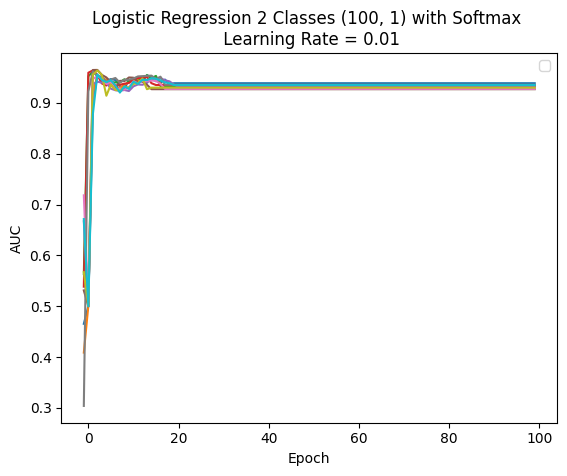


Test set: Avg. loss: 0.03238237373083521, AUC: 0.5110321383100487


Test set: Avg. loss: 0.09061510469108881, AUC: 0.906593347708479


Test set: Avg. loss: 0.06558186469857984, AUC: 0.9490929083091485


Test set: Avg. loss: 0.06415636248223283, AUC: 0.9527120584036729


Test set: Avg. loss: 0.06795530141510578, AUC: 0.9506758176042662


Test set: Avg. loss: 0.08100908093817732, AUC: 0.9399041037754048


Test set: Avg. loss: 0.08376035828521286, AUC: 0.9363106746172939


Test set: Avg. loss: 0.07930143921024804, AUC: 0.938364062707643


Test set: Avg. loss: 0.068249163420304, AUC: 0.9465776150690393


Test set: Avg. loss: 0.07504951682396804, AUC: 0.9399041037754048


Test set: Avg. loss: 0.07202389719076532, AUC: 0.941957491865754


Test set: Avg. loss: 0.06704596012028602, AUC: 0.9455509210238647


Test set: Avg. loss: 0.06955141458452119, AUC: 0.9414441448431666


Test set: Avg. loss: 0.058359479805450754, AUC: 0.9506758176042662


Test set: Avg. loss: 0.05157306722479084, AUC: 0.95


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 0.9275923488787815


Test set: Avg. loss: 0.09811094532842221, AUC: 


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155989


Test set: Avg. loss: 0.07968391197315161, AUC: 0.911165244155


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 0.9337439395043577


Test set: Avg. loss: 0.08281496889102533, AUC: 


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 0.9311857780368924


Test set: Avg. loss: 0.07678412008976591, AUC: 


Test set: Avg. loss: 0.077038660306121, AUC: 0.9321953247911245


Test set: Avg. loss: 0.08238154464626904, AUC: 0.9265485075426646


Test set: Avg. loss: 0.09581089612119686, AUC: 0.9162901407363905


Test set: Avg. loss: 0.07546073013210888, AUC: 0.9296285896781882


Test set: Avg. loss: 0.06830857160422125, AUC: 0.9357887539492354


Test set: Avg. loss: 0.058108918168283154, AUC: 0.9419489182202827


Test set: Avg. loss: 0.06455781987982014, AUC: 0.9368240216398812


Test set: Avg. loss: 0.05512310802072719, AUC: 0.9429756122654572


Test set: Avg. loss: 0.08048488585351664, AUC: 0.9286104692784849


Test set: Avg. loss: 0.07641082274000591, AUC: 0.9301505103462466


Test set: Avg. loss: 0.07374612440974075, AUC: 0.9316905514140085


Test set: Avg. loss: 0.080895735857156, AUC: 0.9270790018561943


Test set: Avg. loss: 0.080895735857156, AUC: 0.9270790018561943


Test set: Avg. loss: 0.080895735857156, AUC: 0.9270790018561943


Test set: Avg. loss: 0.080895735857156, AUC: 0.9270790


Test set: Avg. loss: 0.07125200938981019, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125222065927572, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125243192874127, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125264714716878, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125285051871037, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125307166058084, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125327898108441, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125347840366403, AUC: 0.9347792071950033


Test set: Avg. loss: 0.0712536857241676, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125389699363313, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125410628861768, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125431360912125, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125451500618186, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125471837772346, AUC: 0.9347792071950033


Test set: Avg. loss: 0.07125491187686012, AUC: 0


Test set: Avg. loss: 0.0700092611845976, AUC: 0.9337439395043577


Test set: Avg. loss: 0.0700093204190272, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000937373001383, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000942704100047, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000949022439203, AUC: 0.9337439395043577


Test set: Avg. loss: 0.0700095514333026, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000960869325121, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000966595319981, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000972518762939, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000977652413505, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000983180960266, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000988906955127, AUC: 0.9337439395043577


Test set: Avg. loss: 0.07000994632949988, AUC: 0.9337439395043577


Test set: Avg. loss: 0.0700099996404865, AUC: 0.9337439395043577


Test set: Avg. loss: 0.0700100569004351, AUC: 0.933


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506


Test set: Avg. loss: 0.06632226742572667, AUC: 0.9409393714660506



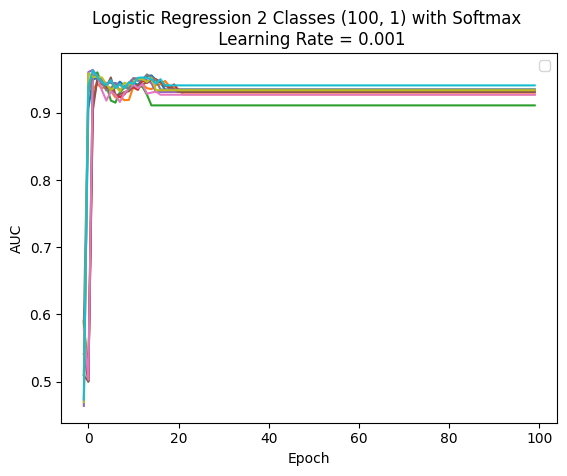


Test set: Avg. loss: 0.020360056164348595, AUC: 0.565892752268801


Test set: Avg. loss: 0.10311835942554672, AUC: 0.5020876826722338


Test set: Avg. loss: 0.018450313966960393, AUC: 0.8721465836166209


Test set: Avg. loss: 0.007610927210584684, AUC: 0.9470652411552128


Test set: Avg. loss: 0.008284045302349588, AUC: 0.9393650358164038


Test set: Avg. loss: 0.009023732033328733, AUC: 0.9373202213715262


Test set: Avg. loss: 0.007552950278572414, AUC: 0.9434718119971021


Test set: Avg. loss: 0.009972232962740628, AUC: 0.9301419367007755


Test set: Avg. loss: 0.011294158595936145, AUC: 0.921415037316792


Test set: Avg. loss: 0.01173164977790406, AUC: 0.9203883432716173


Test set: Avg. loss: 0.010671385573551028, AUC: 0.9265485075426646


Test set: Avg. loss: 0.010545500070165156, AUC: 0.9265485075426646


Test set: Avg. loss: 0.009865750437197477, AUC: 0.9291152426556011


Test set: Avg. loss: 0.010036579076794611, AUC: 0.9280885486104264


Test set: Avg. loss: 0.00922962696162


Test set: Avg. loss: 0.006214706794075344, AUC: 0.9429756122654572


Test set: Avg. loss: 0.006384726883708567, AUC: 0.9440108799561029


Test set: Avg. loss: 0.007002416111174084, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007347306602983494, AUC: 0.9352839805721194


Test set: Avg. loss: 0.007347672128776093, AUC: 0.9352839805721194


Test set: Avg. loss: 0.00734803395241684, AUC: 0.9352839805721194


Test set: Avg. loss: 0.00734838985261463, AUC: 0.9352839805721194


Test set: Avg. loss: 0.007348742791090939, AUC: 0.9352839805721194


Test set: Avg. loss: 0.00734909054655466, AUC: 0.9352839805721194


Test set: Avg. loss: 0.007349433612626038, AUC: 0.9352839805721194


Test set: Avg. loss: 0.007349771742494951, AUC: 0.9352839805721194


Test set: Avg. loss: 0.007350104689351274, AUC: 0.9352839805721194


Test set: Avg. loss: 0.007350435414916486, AUC: 0.9352839805721194


Test set: Avg. loss: 0.007350760463848864, AUC: 0.9352839805721194


Test set: Avg. loss: 0.0073510803297


Test set: Avg. loss: 0.009762844930771222, AUC: 0.917316834781565


Test set: Avg. loss: 0.00976265439335604, AUC: 0.917316834781565


Test set: Avg. loss: 0.009762465089991472, AUC: 0.917316834781565


Test set: Avg. loss: 0.009762277514297769, AUC: 0.917316834781565


Test set: Avg. loss: 0.009762092900325547, AUC: 0.917316834781565


Test set: Avg. loss: 0.009761908533163445, AUC: 0.917316834781565


Test set: Avg. loss: 0.009761726387292455, AUC: 0.917316834781565


Test set: Avg. loss: 0.009761545969092327, AUC: 0.917316834781565


Test set: Avg. loss: 0.009761367278563063, AUC: 0.917316834781565


Test set: Avg. loss: 0.009761189081654045, AUC: 0.917316834781565


Test set: Avg. loss: 0.00976101409327663, AUC: 0.917316834781565


Test set: Avg. loss: 0.009760840585759954, AUC: 0.917316834781565


Test set: Avg. loss: 0.009760668065483773, AUC: 0.917316834781565


Test set: Avg. loss: 0.009760498013308824, AUC: 0.917316834781565


Test set: Avg. loss: 0.009760328948374367, AUC: 0


Test set: Avg. loss: 0.007595611408383703, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007596466111840668, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007597305266259867, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007598132573793146, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007598943838668413, AUC: 0.9368325952853523


Test set: Avg. loss: 0.00759974325665776, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007600528112849834, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007601301862586359, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007602062037766103, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007602811600110546, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007603549068758947, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007604274690521429, AUC: 0.9368325952853523


Test set: Avg. loss: 0.0076049926611700906, AUC: 0.9368325952853523


Test set: Avg. loss: 0.007605695823211354, AUC: 0.9368325952853523


Test set: Avg. loss: 0.0076063898


Test set: Avg. loss: 0.008218936545014629, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008219169533771017, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008219399560805926, AUC: 0.9316991250594797


Test set: Avg. loss: 0.00821962613249911, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008219846040318965, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008220064960898327, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008220280919756209, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008220491695601502, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008220700990586053, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008220907817469373, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008221109461340104, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008221307649869109, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008221504604347498, AUC: 0.9316991250594797


Test set: Avg. loss: 0.00822169884391453, AUC: 0.9316991250594797


Test set: Avg. loss: 0.008221888887


Test set: Avg. loss: 0.007889810309400223, AUC: 0.9214321846077342


Test set: Avg. loss: 0.00788929595710328, AUC: 0.9214321846077342


Test set: Avg. loss: 0.007888788021869542, AUC: 0.9214321846077342


Test set: Avg. loss: 0.03448933054448161, AUC: 0.3165754287894441


Test set: Avg. loss: 0.006433423261464752, AUC: 0.9264692013220561


Test set: Avg. loss: 0.005368376987567846, AUC: 0.9562540456889567


Test set: Avg. loss: 0.006442728496733166, AUC: 0.9527120584036729


Test set: Avg. loss: 0.006763167016007638, AUC: 0.9501538969362079


Test set: Avg. loss: 0.006992706847733839, AUC: 0.946560467778097


Test set: Avg. loss: 0.0068638709761341165, AUC: 0.9460556944009809


Test set: Avg. loss: 0.008477408693443914, AUC: 0.9352839805721194


Test set: Avg. loss: 0.008379075838171917, AUC: 0.9342572865269448


Test set: Avg. loss: 0.007617931681883755, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007052800916983721, AUC: 0.9399041037754048


Test set: Avg. loss: 0.007195518870


Test set: Avg. loss: 0.006389501919163927, AUC: 0.9460728416919232


Test set: Avg. loss: 0.006722068687897044, AUC: 0.9435061065789869


Test set: Avg. loss: 0.007762929173976985, AUC: 0.9352925542175905


Test set: Avg. loss: 0.009586327317832172, AUC: 0.9229722256754961


Test set: Avg. loss: 0.00958775017819296, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009589010143872374, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009590131402262496, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009591128021540355, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009592018265655075, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009592817190024177, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009593533186191851, AUC: 0.9229722256754961


Test set: Avg. loss: 0.00959417612656303, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009594757858023634, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009595285291257112, AUC: 0.9229722256754961


Test set: Avg. loss: 0.009595761634


Test set: Avg. loss: 0.008333190874530168, AUC: 0.9270790018561943


Test set: Avg. loss: 0.00833144419928762, AUC: 0.9270790018561943


Test set: Avg. loss: 0.008329801184296855, AUC: 0.9270790018561943


Test set: Avg. loss: 0.008328252944393435, AUC: 0.9275923488787815


Test set: Avg. loss: 0.008326789607172426, AUC: 0.9275923488787815


Test set: Avg. loss: 0.008325404508760504, AUC: 0.9275923488787815


Test set: Avg. loss: 0.00832408901080335, AUC: 0.9275923488787815


Test set: Avg. loss: 0.008322840398389608, AUC: 0.9275923488787815


Test set: Avg. loss: 0.0083216483054941, AUC: 0.9275923488787815


Test set: Avg. loss: 0.008320511498066209, AUC: 0.9275923488787815


Test set: Avg. loss: 0.008319422571802237, AUC: 0.9275923488787815


Test set: Avg. loss: 0.008318381526702185, AUC: 0.9275923488787815


Test set: Avg. loss: 0.00831738219251297, AUC: 0.9275923488787815


Test set: Avg. loss: 0.008316422841563729, AUC: 0.9275923488787815


Test set: Avg. loss: 0.008315500512132


Test set: Avg. loss: 0.007442323564249042, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007442586170220227, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007442849023001534, AUC: 0.9378507156850558


Test set: Avg. loss: 0.00744310570552976, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007443362634868109, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007443614134383745, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007443864399848764, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007444112444022675, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007444355058373871, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007444596932294699, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007444835597683924, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007445074756693396, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007445308485880155, AUC: 0.9378507156850558


Test set: Avg. loss: 0.007445543202307407, AUC: 0.9378507156850558


Test set: Avg. loss: 0.00744577224

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.007451962980424396, AUC: 0.9378507156850558


Test set: Avg. loss: 0.0074521399432827965, AUC: 0.9378507156850558



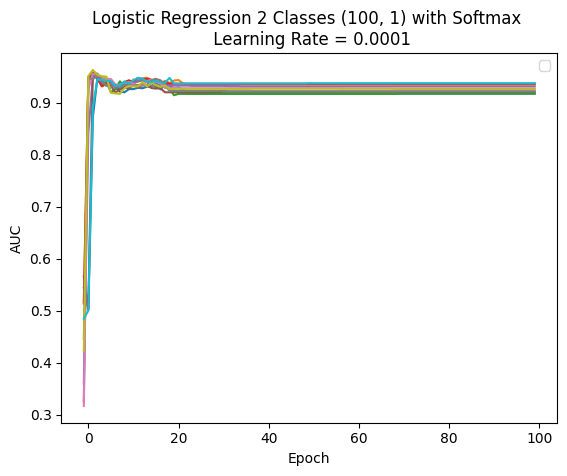


Test set: Avg. loss: 0.01358366753003612, AUC: 0.6782589498141662


Test set: Avg. loss: 0.006157473500964557, AUC: 0.8113187124099231


Test set: Avg. loss: 0.0036347206088079924, AUC: 0.8869436239942042


Test set: Avg. loss: 0.003718408862009305, AUC: 0.8900580007116125


Test set: Avg. loss: 0.003705520560775978, AUC: 0.8895618009799677


Test set: Avg. loss: 0.0035029232625388702, AUC: 0.8947124184967827


Test set: Avg. loss: 0.003581276221304947, AUC: 0.8947124184967827


Test set: Avg. loss: 0.003708448839483794, AUC: 0.8921456833838464


Test set: Avg. loss: 0.003623495314185417, AUC: 0.8936857244516082


Test set: Avg. loss: 0.003668522242433536, AUC: 0.8916323363612592


Test set: Avg. loss: 0.0037191137517214316, AUC: 0.8890656012483228


Test set: Avg. loss: 0.003765161980259739, AUC: 0.8880389072031483


Test set: Avg. loss: 0.003814869539091059, AUC: 0.8870122131579737


Test set: Avg. loss: 0.003846834905399299, AUC: 0.8864988661353865


Test set: Avg. loss: 0.00379814


Test set: Avg. loss: 0.0038461243390543365, AUC: 0.8947381394331964


Test set: Avg. loss: 0.003850038871014834, AUC: 0.895773407123842


Test set: Avg. loss: 0.003896840981074742, AUC: 0.895773407123842


Test set: Avg. loss: 0.003857188590071463, AUC: 0.8968001011690165


Test set: Avg. loss: 0.0038406683544688095, AUC: 0.8973134481916039


Test set: Avg. loss: 0.0038899865703306336, AUC: 0.8962867541464292


Test set: Avg. loss: 0.003966753033624179, AUC: 0.8952600601012548


Test set: Avg. loss: 0.004016225629218123, AUC: 0.894224792410609


Test set: Avg. loss: 0.004077302743189083, AUC: 0.8931980983654345


Test set: Avg. loss: 0.004140633356990775, AUC: 0.8926847513428473


Test set: Avg. loss: 0.0042136943364982525, AUC: 0.8916580572976727


Test set: Avg. loss: 0.004289366320300053, AUC: 0.8901180162299109


Test set: Avg. loss: 0.004338614071871676, AUC: 0.8890913221847364


Test set: Avg. loss: 0.004374570851493819, AUC: 0.8890913221847364


Test set: Avg. loss: 0.004405569


Test set: Avg. loss: 0.004814068599764111, AUC: 0.8829140106227468


Test set: Avg. loss: 0.00485017494632097, AUC: 0.8813739695549849


Test set: Avg. loss: 0.004891369406974587, AUC: 0.8808691961778689


Test set: Avg. loss: 0.004951374871390206, AUC: 0.8798425021326943


Test set: Avg. loss: 0.005009250241036741, AUC: 0.8798425021326943


Test set: Avg. loss: 0.005047445711882218, AUC: 0.8798425021326943


Test set: Avg. loss: 0.005074461177762744, AUC: 0.8798425021326943


Test set: Avg. loss: 0.0050955661582156985, AUC: 0.879329155110107


Test set: Avg. loss: 0.005113275895207565, AUC: 0.8788158080875198


Test set: Avg. loss: 0.005128957593416328, AUC: 0.8788158080875198


Test set: Avg. loss: 0.005143391296236658, AUC: 0.8783024610649326


Test set: Avg. loss: 0.005157029530029613, AUC: 0.8777891140423453


Test set: Avg. loss: 0.00517013440714613, AUC: 0.8777891140423453


Test set: Avg. loss: 0.005182873635064988, AUC: 0.8777891140423453


Test set: Avg. loss: 0.005195355193


Test set: Avg. loss: 0.005440972112967608, AUC: 0.8747090319068216


Test set: Avg. loss: 0.005432539228079975, AUC: 0.8752223789294089


Test set: Avg. loss: 0.005429400667147113, AUC: 0.8757357259519963


Test set: Avg. loss: 0.005431940590125927, AUC: 0.8757357259519963


Test set: Avg. loss: 0.005431285432653644, AUC: 0.8747090319068216


Test set: Avg. loss: 0.005422973854941611, AUC: 0.8741956848842344


Test set: Avg. loss: 0.005409968935925028, AUC: 0.8741956848842344


Test set: Avg. loss: 0.005395377644840975, AUC: 0.8747090319068216


Test set: Avg. loss: 0.0053813920257994845, AUC: 0.8757357259519963


Test set: Avg. loss: 0.005371981526013487, AUC: 0.8762490729745834


Test set: Avg. loss: 0.00538142238344465, AUC: 0.8762490729745834


Test set: Avg. loss: 0.005439360689672624, AUC: 0.8752223789294089


Test set: Avg. loss: 0.005518960286371456, AUC: 0.8747090319068216


Test set: Avg. loss: 0.005561793319433619, AUC: 0.8726556438164725


Test set: Avg. loss: 0.0055846254


Test set: Avg. loss: 0.004765556095549779, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004772323999345672, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004777292533937695, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004781151780430574, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004784285528566033, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004786915167024664, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004789182735032423, AUC: 0.8685488676357744


Test set: Avg. loss: 0.0047911810331956696, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004792970776804732, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004794594293795758, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004796080460953169, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004797457661441147, AUC: 0.8685488676357744


Test set: Avg. loss: 0.004798740950677212, AUC: 0.8680355206131871


Test set: Avg. loss: 0.004799944026623207, AUC: 0.8680355206131871


Test set: Avg. loss: 0.004801077


Test set: Avg. loss: 0.004025239751946112, AUC: 0.8813739695549849


Test set: Avg. loss: 0.004026553769042526, AUC: 0.8813739695549849


Test set: Avg. loss: 0.004027817930494036, AUC: 0.8813739695549849


Test set: Avg. loss: 0.004029040381034709, AUC: 0.8813739695549849


Test set: Avg. loss: 0.004030224082386025, AUC: 0.8813739695549849


Test set: Avg. loss: 0.00403136804730749, AUC: 0.8813739695549849


Test set: Avg. loss: 0.05783585534579512, AUC: 0.30556258118170554


Test set: Avg. loss: 0.0363514250603275, AUC: 0.4764267617769737


Test set: Avg. loss: 0.006731455864126391, AUC: 0.773038457086761


Test set: Avg. loss: 0.0039625162910477225, AUC: 0.8754356483605046


Test set: Avg. loss: 0.004042336289186655, AUC: 0.8884493704800812


Test set: Avg. loss: 0.0042171083375287105, AUC: 0.8936685771606657


Test set: Avg. loss: 0.0037665991556076776, AUC: 0.9029173972127078


Test set: Avg. loss: 0.0036807135518786825, AUC: 0.9075375204159931


Test set: Avg. loss: 0.0039621642


Test set: Avg. loss: 0.0026936536620122305, AUC: 0.9131843376644532


Test set: Avg. loss: 0.002623818305708607, AUC: 0.9167777668225641


Test set: Avg. loss: 0.0025568506362275306, AUC: 0.9183178078903259


Test set: Avg. loss: 0.0025034236488381775, AUC: 0.9203711959806751


Test set: Avg. loss: 0.0024904191617393097, AUC: 0.9214064636713207


Test set: Avg. loss: 0.0024843849627374367, AUC: 0.9229550783845537


Test set: Avg. loss: 0.002470844280645714, AUC: 0.9234684254071411


Test set: Avg. loss: 0.002462858492296428, AUC: 0.9244951194523156


Test set: Avg. loss: 0.0024558609933833402, AUC: 0.9250084664749028


Test set: Avg. loss: 0.0024563300560226597, AUC: 0.9250084664749028


Test set: Avg. loss: 0.0024793294275769536, AUC: 0.9250084664749028


Test set: Avg. loss: 0.0025083776833354564, AUC: 0.9234684254071411


Test set: Avg. loss: 0.002527396069303556, AUC: 0.9229550783845537


Test set: Avg. loss: 0.0025377066239066744, AUC: 0.9229550783845537


Test set: Avg. loss: 0.


Test set: Avg. loss: 0.003451438424009714, AUC: 0.885480745735683


Test set: Avg. loss: 0.003506724385247714, AUC: 0.8824006636001597


Test set: Avg. loss: 0.0035452031941147323, AUC: 0.8824006636001597


Test set: Avg. loss: 0.003580499633252004, AUC: 0.8813739695549849


Test set: Avg. loss: 0.0036063444787177486, AUC: 0.8813739695549849


Test set: Avg. loss: 0.0036261485230108226, AUC: 0.8818873165775722


Test set: Avg. loss: 0.0036427766146373552, AUC: 0.8813739695549849


Test set: Avg. loss: 0.0036585007641873253, AUC: 0.8813739695549849


Test set: Avg. loss: 0.0036741513643205534, AUC: 0.8813739695549849


Test set: Avg. loss: 0.003690080366272857, AUC: 0.8798339284872232


Test set: Avg. loss: 0.003706708087684205, AUC: 0.8798339284872232


Test set: Avg. loss: 0.0037266990906456737, AUC: 0.8798339284872232


Test set: Avg. loss: 0.0037579573459506775, AUC: 0.8793205814646359


Test set: Avg. loss: 0.0037845934646717014, AUC: 0.8788072344420487


Test set: Avg. loss: 0.00


Test set: Avg. loss: 0.004423094708973823, AUC: 0.8695584143900066


Test set: Avg. loss: 0.004445704860963683, AUC: 0.8695584143900066


Test set: Avg. loss: 0.004500711186331992, AUC: 0.8690450673674194


Test set: Avg. loss: 0.004549742979045733, AUC: 0.8685402939903033


Test set: Avg. loss: 0.00457661381419401, AUC: 0.8670002529225413


Test set: Avg. loss: 0.004593878922748763, AUC: 0.8664869058999541


Test set: Avg. loss: 0.004606302110304743, AUC: 0.8664869058999541


Test set: Avg. loss: 0.004615875257961992, AUC: 0.8659735588773669


Test set: Avg. loss: 0.004623595602023675, AUC: 0.8654602118547796


Test set: Avg. loss: 0.004630033150469541, AUC: 0.8649468648321923


Test set: Avg. loss: 0.004635532203421583, AUC: 0.8649468648321923


Test set: Avg. loss: 0.004640324021965327, AUC: 0.8649468648321923


Test set: Avg. loss: 0.0046445606411367225, AUC: 0.8649468648321923


Test set: Avg. loss: 0.004648351891440634, AUC: 0.8649468648321923


Test set: Avg. loss: 0.0046517821

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.004701892534891765, AUC: 0.8629020503873144


Test set: Avg. loss: 0.004702684671982475, AUC: 0.8629020503873144



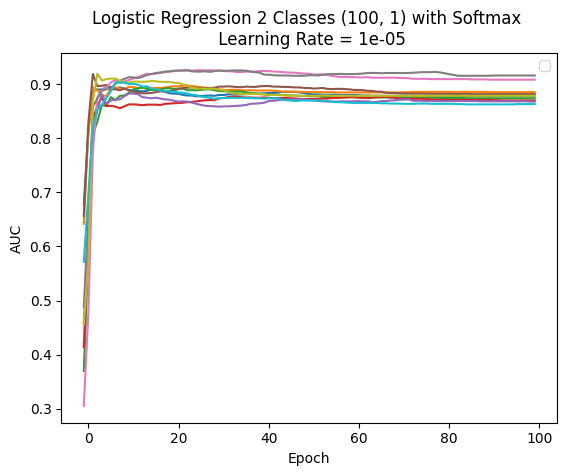


Test set: Avg. loss: 0.03036915244029422, AUC: 0.4360813296009396


Test set: Avg. loss: 0.05187304321036329, AUC: 0.5033790880213312


Test set: Avg. loss: 0.050742147378546355, AUC: 0.506510612029682


Test set: Avg. loss: 0.04732129983526826, AUC: 0.5126879235916716


Test set: Avg. loss: 0.04314999353317987, AUC: 0.5244863314657076


Test set: Avg. loss: 0.03908389350148708, AUC: 0.5419487038791458


Test set: Avg. loss: 0.035198644081257884, AUC: 0.5532423383760657


Test set: Avg. loss: 0.03160225728036948, AUC: 0.5706961371440329


Test set: Avg. loss: 0.028421125550200974, AUC: 0.5912214444020525


Test set: Avg. loss: 0.025730320632334328, AUC: 0.6086752431700198


Test set: Avg. loss: 0.0232769717340884, AUC: 0.6281824300283358


Test set: Avg. loss: 0.021329399961862505, AUC: 0.6492210843089427


Test set: Avg. loss: 0.01981926063079518, AUC: 0.666683456722381


Test set: Avg. loss: 0.018459425703092145, AUC: 0.6779856648647722


Test set: Avg. loss: 0.01736062900867028, AU


Test set: Avg. loss: 0.00712080747197627, AUC: 0.7735368002297737


Test set: Avg. loss: 0.006799235106995387, AUC: 0.7822636996137573


Test set: Avg. loss: 0.006492262794857933, AUC: 0.7889372109073917


Test set: Avg. loss: 0.006227498469145402, AUC: 0.7945926018013229


Test set: Avg. loss: 0.005996524423792743, AUC: 0.7992212986500794


Test set: Avg. loss: 0.0057811907359531945, AUC: 0.8100015861244122


Test set: Avg. loss: 0.005575353067607367, AUC: 0.8141083623051103


Test set: Avg. loss: 0.005413975774871637, AUC: 0.8171884444406339


Test set: Avg. loss: 0.00532407938323406, AUC: 0.8187284855083958


Test set: Avg. loss: 0.00527668295439726, AUC: 0.8187284855083958


Test set: Avg. loss: 0.005233992700991424, AUC: 0.8202685265761575


Test set: Avg. loss: 0.005183335663615793, AUC: 0.8218171412893905


Test set: Avg. loss: 0.0051238410961553914, AUC: 0.8238705293797397


Test set: Avg. loss: 0.005056669746620068, AUC: 0.8284906525830251


Test set: Avg. loss: 0.00498262843


Test set: Avg. loss: 0.005852278221714817, AUC: 0.832084081741136


Test set: Avg. loss: 0.0057280771974204244, AUC: 0.8336241228088977


Test set: Avg. loss: 0.005621212362996293, AUC: 0.8351641638766596


Test set: Avg. loss: 0.0055288125762781495, AUC: 0.8372175519670086


Test set: Avg. loss: 0.005443537210578998, AUC: 0.8418376751702941


Test set: Avg. loss: 0.005360766720821151, AUC: 0.8438910632606431


Test set: Avg. loss: 0.005279269277679254, AUC: 0.8464577983735796


Test set: Avg. loss: 0.005199999912925388, AUC: 0.8500512275316904


Test set: Avg. loss: 0.005126002782620258, AUC: 0.8515912685994522


Test set: Avg. loss: 0.005062349094367175, AUC: 0.8515912685994522


Test set: Avg. loss: 0.005015467388042505, AUC: 0.8536532303352724


Test set: Avg. loss: 0.004992670894409559, AUC: 0.8551932714030342


Test set: Avg. loss: 0.0049921823337704995, AUC: 0.8541665773578597


Test set: Avg. loss: 0.004999336125194162, AUC: 0.854679924380447


Test set: Avg. loss: 0.005000370


Test set: Avg. loss: 0.005594946336055147, AUC: 0.8628677558054296


Test set: Avg. loss: 0.005525983638644959, AUC: 0.8654344909183659


Test set: Avg. loss: 0.005458247834357662, AUC: 0.8659478379409532


Test set: Avg. loss: 0.005392838215482408, AUC: 0.8669745319861278


Test set: Avg. loss: 0.005330796320739494, AUC: 0.8685145730538897


Test set: Avg. loss: 0.005273120990697888, AUC: 0.8690279200764769


Test set: Avg. loss: 0.005220734307978217, AUC: 0.871081308166826


Test set: Avg. loss: 0.005174326600495332, AUC: 0.8726213492345878


Test set: Avg. loss: 0.005134116048398225, AUC: 0.8746747373249368


Test set: Avg. loss: 0.005099644818908186, AUC: 0.8751880843475242


Test set: Avg. loss: 0.0050698180623182845, AUC: 0.8757014313701114


Test set: Avg. loss: 0.00504325833133042, AUC: 0.8762147783926987


Test set: Avg. loss: 0.005018720715682699, AUC: 0.8762147783926987


Test set: Avg. loss: 0.004995281898703881, AUC: 0.8762147783926987


Test set: Avg. loss: 0.00497236187


Test set: Avg. loss: 0.0039395399962399566, AUC: 0.8587609796247314


Test set: Avg. loss: 0.00391471941278588, AUC: 0.8597876736699062


Test set: Avg. loss: 0.003890536710095455, AUC: 0.8608143677150805


Test set: Avg. loss: 0.0038671549062551176, AUC: 0.8608143677150805


Test set: Avg. loss: 0.003844814887945203, AUC: 0.8613277147376678


Test set: Avg. loss: 0.0038238489849967247, AUC: 0.8613277147376678


Test set: Avg. loss: 0.0038046728256573093, AUC: 0.8623544087828425


Test set: Avg. loss: 0.0037877248681109886, AUC: 0.8628677558054296


Test set: Avg. loss: 0.0037733370719735915, AUC: 0.8633811028280168


Test set: Avg. loss: 0.0037616021144464148, AUC: 0.8638944498506042


Test set: Avg. loss: 0.0037522851556971454, AUC: 0.8638944498506042


Test set: Avg. loss: 0.0037448771498464896, AUC: 0.8649211438957787


Test set: Avg. loss: 0.0037387798291555843, AUC: 0.8649211438957787


Test set: Avg. loss: 0.003733427381416779, AUC: 0.8649211438957787


Test set: Avg. loss: 0.0


Test set: Avg. loss: 0.004424305312628578, AUC: 0.861379156610495


Test set: Avg. loss: 0.004425662644901631, AUC: 0.861379156610495


Test set: Avg. loss: 0.0044271141352367205, AUC: 0.861379156610495


Test set: Avg. loss: 0.004428620911039427, AUC: 0.861379156610495


Test set: Avg. loss: 0.004430132252829415, AUC: 0.8608658095879078


Test set: Avg. loss: 0.004431580534632902, AUC: 0.8608658095879078


Test set: Avg. loss: 0.03947994871909574, AUC: 0.514569838772597


Test set: Avg. loss: 0.04209966244904891, AUC: 0.5146727225182511


Test set: Avg. loss: 0.038607178761105115, AUC: 0.5224072224389449


Test set: Avg. loss: 0.035163861624202375, AUC: 0.5285759603554633


Test set: Avg. loss: 0.03201537102645969, AUC: 0.540400089165913


Test set: Avg. loss: 0.029257503849132213, AUC: 0.548605067881838


Test set: Avg. loss: 0.026699177720285103, AUC: 0.5583586613109961


Test set: Avg. loss: 0.024311590885770493, AUC: 0.5727495252343822


Test set: Avg. loss: 0.022160941769617686,


Test set: Avg. loss: 0.015801674584177465, AUC: 0.6898526619025777


Test set: Avg. loss: 0.015078895580694543, AUC: 0.6996062553317358


Test set: Avg. loss: 0.014429067232593986, AUC: 0.7093598487608938


Test set: Avg. loss: 0.013954192708491292, AUC: 0.7124399308964174


Test set: Avg. loss: 0.013517346194565419, AUC: 0.7206534832578138


Test set: Avg. loss: 0.013075903088903329, AUC: 0.7263003005062737


Test set: Avg. loss: 0.01267287696617237, AUC: 0.731955691400205


Test set: Avg. loss: 0.012279921683712282, AUC: 0.7365758146034903


Test set: Avg. loss: 0.011884378350299337, AUC: 0.7391425497164266


Test set: Avg. loss: 0.011535131659813796, AUC: 0.7468427550552357


Test set: Avg. loss: 0.011233633843021116, AUC: 0.7499314108362304


Test set: Avg. loss: 0.010944077687233872, AUC: 0.7535248399943415


Test set: Avg. loss: 0.010674574607154104, AUC: 0.7576316161750396


Test set: Avg. loss: 0.010455976608623876, AUC: 0.7607116983105631


Test set: Avg. loss: 0.010282557449


Test set: Avg. loss: 0.007295662818734937, AUC: 0.8310659613414326


Test set: Avg. loss: 0.0072295939700203656, AUC: 0.8310659613414326


Test set: Avg. loss: 0.007183538213773297, AUC: 0.8310659613414326


Test set: Avg. loss: 0.007152199745178223, AUC: 0.8315793083640199


Test set: Avg. loss: 0.007128067638563073, AUC: 0.8320926553866073


Test set: Avg. loss: 0.00710611215042525, AUC: 0.8326060024091944


Test set: Avg. loss: 0.007084324246361142, AUC: 0.8336412700998401


Test set: Avg. loss: 0.00706277056510404, AUC: 0.8357032318356603


Test set: Avg. loss: 0.007042376397806171, AUC: 0.8372432729034223


Test set: Avg. loss: 0.007023791348712044, AUC: 0.836729925880835


Test set: Avg. loss: 0.007006343353855931, AUC: 0.8372432729034223


Test set: Avg. loss: 0.006987428813247207, AUC: 0.8382699669485967


Test set: Avg. loss: 0.006964246678796614, AUC: 0.838783313971184


Test set: Avg. loss: 0.006937851323350863, AUC: 0.8398100080163585


Test set: Avg. loss: 0.0069112427239


Test set: Avg. loss: 0.005241680712926956, AUC: 0.8510779215768649


Test set: Avg. loss: 0.005201079830619859, AUC: 0.8521046156220394


Test set: Avg. loss: 0.005162360628692754, AUC: 0.8510779215768649


Test set: Avg. loss: 0.0051302721041329895, AUC: 0.8510779215768649


Test set: Avg. loss: 0.005108592919928193, AUC: 0.8515912685994522


Test set: Avg. loss: 0.005097428340595948, AUC: 0.8521046156220394


Test set: Avg. loss: 0.005093648813772893, AUC: 0.853131309667214


Test set: Avg. loss: 0.005092804229530982, AUC: 0.8526179626446266


Test set: Avg. loss: 0.005090125352452754, AUC: 0.8526179626446266


Test set: Avg. loss: 0.00508209550849646, AUC: 0.8526179626446266


Test set: Avg. loss: 0.0050691833900862356, AUC: 0.8526179626446266


Test set: Avg. loss: 0.005054296420474477, AUC: 0.853131309667214


Test set: Avg. loss: 0.005039144006575116, AUC: 0.853131309667214


Test set: Avg. loss: 0.005024001341675626, AUC: 0.853131309667214


Test set: Avg. loss: 0.0050085681812

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0043193211713439435, AUC: 0.8716118024803556


Test set: Avg. loss: 0.004322377914720934, AUC: 0.8710984554577683



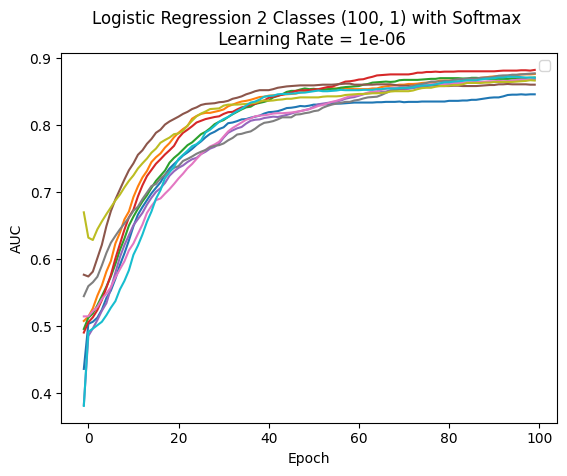


Test set: Avg. loss: 0.017256723427624437, AUC: 0.5512018107539235


Test set: Avg. loss: 0.022331058115198994, AUC: 0.5572280118144836


Test set: Avg. loss: 0.025446987546995807, AUC: 0.5508974463396964


Test set: Avg. loss: 0.027459101153703456, AUC: 0.5536013597801718


Test set: Avg. loss: 0.02873911077684991, AUC: 0.550059372494888


Test set: Avg. loss: 0.029575100103026837, AUC: 0.5516680027264192


Test set: Avg. loss: 0.030180142286154548, AUC: 0.5511889502857168


Test set: Avg. loss: 0.030613142017498766, AUC: 0.5496746301543686


Test set: Avg. loss: 0.03089675844085883, AUC: 0.5486565097546652


Test set: Avg. loss: 0.031056019089977193, AUC: 0.5491784304227236


Test set: Avg. loss: 0.031125197005814894, AUC: 0.549700351090782


Test set: Avg. loss: 0.031125109141411002, AUC: 0.5497089247362533


Test set: Avg. loss: 0.03106737038116771, AUC: 0.5502308454043118


Test set: Avg. loss: 0.030964455495956767, AUC: 0.5502308454043118


Test set: Avg. loss: 0.030826310933746


Test set: Avg. loss: 0.02978558569961453, AUC: 0.5280540396874047


Test set: Avg. loss: 0.029658114194376375, AUC: 0.5285673867099921


Test set: Avg. loss: 0.029518101773153428, AUC: 0.5311512691138709


Test set: Avg. loss: 0.029367115186608356, AUC: 0.5326913101816326


Test set: Avg. loss: 0.029206047887387482, AUC: 0.5326913101816326


Test set: Avg. loss: 0.02903536585300359, AUC: 0.53320465720422


Test set: Avg. loss: 0.028855429426236676, AUC: 0.5337180042268073


Test set: Avg. loss: 0.02866665818429635, AUC: 0.5357885396080987


Test set: Avg. loss: 0.028469613867023222, AUC: 0.5368152336532731


Test set: Avg. loss: 0.028264958912788216, AUC: 0.5378419276984477


Test set: Avg. loss: 0.02805332811722844, AUC: 0.5383552747210351


Test set: Avg. loss: 0.027835285194665504, AUC: 0.5383552747210351


Test set: Avg. loss: 0.027611274403321322, AUC: 0.5399038894342679


Test set: Avg. loss: 0.027381728154531916, AUC: 0.5414525041475009


Test set: Avg. loss: 0.0271471361195819


Test set: Avg. loss: 0.040011966697424343, AUC: 0.5101640567060912


Test set: Avg. loss: 0.03960679925006369, AUC: 0.5106774037286783


Test set: Avg. loss: 0.03919958426592019, AUC: 0.5106774037286783


Test set: Avg. loss: 0.03879063963643266, AUC: 0.5122174447964403


Test set: Avg. loss: 0.03838030102336876, AUC: 0.5132441388416148


Test set: Avg. loss: 0.037969020582874366, AUC: 0.5137574858642021


Test set: Avg. loss: 0.037557301807601015, AUC: 0.5158194476000223


Test set: Avg. loss: 0.03714579232731221, AUC: 0.5158194476000223


Test set: Avg. loss: 0.036735208878606006, AUC: 0.5158194476000223


Test set: Avg. loss: 0.036326443926888226, AUC: 0.5178728356903713


Test set: Avg. loss: 0.03592047286576613, AUC: 0.5183861827129587


Test set: Avg. loss: 0.03551811905381102, AUC: 0.5194128767581331


Test set: Avg. loss: 0.035119581913602524, AUC: 0.520952917825895


Test set: Avg. loss: 0.034724517885449016, AUC: 0.5224929588936568


Test set: Avg. loss: 0.034332358318826424


Test set: Avg. loss: 0.02413346999427053, AUC: 0.6251280688292259


Test set: Avg. loss: 0.023988372297267243, AUC: 0.6261547628744004


Test set: Avg. loss: 0.02384216000574716, AUC: 0.6261547628744004


Test set: Avg. loss: 0.023694927894797633, AUC: 0.6261547628744004


Test set: Avg. loss: 0.023546804305682765, AUC: 0.6261547628744004


Test set: Avg. loss: 0.0233979284393121, AUC: 0.6261461892289292


Test set: Avg. loss: 0.023248507616189202, AUC: 0.6261461892289292


Test set: Avg. loss: 0.02309872743752679, AUC: 0.6276948039421621


Test set: Avg. loss: 0.02294880608347385, AUC: 0.6297481920325112


Test set: Avg. loss: 0.022798979504508262, AUC: 0.6312968067457442


Test set: Avg. loss: 0.022649493523512816, AUC: 0.6323235007909187


Test set: Avg. loss: 0.022500572244079465, AUC: 0.6328368478135061


Test set: Avg. loss: 0.02235249604250827, AUC: 0.6338635418586805


Test set: Avg. loss: 0.022205579848516555, AUC: 0.6338635418586805


Test set: Avg. loss: 0.02206021658382060


Test set: Avg. loss: 0.022416533397098013, AUC: 0.6282595928375765


Test set: Avg. loss: 0.022249682843068126, AUC: 0.6292862868827511


Test set: Avg. loss: 0.02208292015344213, AUC: 0.6303129809279256


Test set: Avg. loss: 0.02191618115758797, AUC: 0.6318530219956874


Test set: Avg. loss: 0.021749468817227127, AUC: 0.6323663690182747


Test set: Avg. loss: 0.021582881856408918, AUC: 0.6333930630634493


Test set: Avg. loss: 0.02141659106773866, AUC: 0.6344197571086239


Test set: Avg. loss: 0.02125090545749072, AUC: 0.6349331041312111


Test set: Avg. loss: 0.02108623374322927, AUC: 0.6349331041312111


Test set: Avg. loss: 0.02092295551892393, AUC: 0.6364731451989728


Test set: Avg. loss: 0.020761229236673864, AUC: 0.6364731451989728


Test set: Avg. loss: 0.02060088953369646, AUC: 0.6374998392441473


Test set: Avg. loss: 0.020441557803262587, AUC: 0.6380131862667346


Test set: Avg. loss: 0.02028292109013591, AUC: 0.6390398803119093


Test set: Avg. loss: 0.020124840687027135


Test set: Avg. loss: 0.01919198579176119, AUC: 0.5917262177791686


Test set: Avg. loss: 0.01900052333223647, AUC: 0.5948062999146922


Test set: Avg. loss: 0.018812514239956873, AUC: 0.5958329939598669


Test set: Avg. loss: 0.018628111537198844, AUC: 0.5978863820502159


Test set: Avg. loss: 0.018447460348314872, AUC: 0.6004616908086233


Test set: Avg. loss: 0.018270821304795164, AUC: 0.601488384853798


Test set: Avg. loss: 0.03718534513043074, AUC: 0.29993934145829143


Test set: Avg. loss: 0.04547026142570543, AUC: 0.39897780711869785


Test set: Avg. loss: 0.05110951733638534, AUC: 0.43308269709739233


Test set: Avg. loss: 0.05453847209859339, AUC: 0.4539680974652017


Test set: Avg. loss: 0.05684446251910666, AUC: 0.47016478546595625


Test set: Avg. loss: 0.05840575176736583, AUC: 0.47643640712812885


Test set: Avg. loss: 0.059454787591969746, AUC: 0.480089851804538


Test set: Avg. loss: 0.06017874881594324, AUC: 0.48375187012641835


Test set: Avg. loss: 0.060688796744336


Test set: Avg. loss: 0.033103867840816266, AUC: 0.5224672379572433


Test set: Avg. loss: 0.032957024702621046, AUC: 0.5224672379572433


Test set: Avg. loss: 0.032775647891974596, AUC: 0.5235110792933602


Test set: Avg. loss: 0.03256581782307437, AUC: 0.5245463469840058


Test set: Avg. loss: 0.032331752974547705, AUC: 0.5245463469840058


Test set: Avg. loss: 0.032076818849235834, AUC: 0.5260863880517677


Test set: Avg. loss: 0.031804016658238, AUC: 0.528148349787588


Test set: Avg. loss: 0.03151620939898442, AUC: 0.5302017378779369


Test set: Avg. loss: 0.031216059659085166, AUC: 0.5312284319231114


Test set: Avg. loss: 0.030906072067671434, AUC: 0.5327684729908734


Test set: Avg. loss: 0.03058863772121769, AUC: 0.5343085140586351


Test set: Avg. loss: 0.03026599469392196, AUC: 0.5353352081038097


Test set: Avg. loss: 0.02993999899791141, AUC: 0.5358485551263968


Test set: Avg. loss: 0.0296115825882116, AUC: 0.5368752491715715


Test set: Avg. loss: 0.02928091428294685, AU


Test set: Avg. loss: 0.027408114131192984, AUC: 0.5507184714904855


Test set: Avg. loss: 0.027130639330940957, AUC: 0.5543290479395387


Test set: Avg. loss: 0.02685119893486702, AUC: 0.5553557419847132


Test set: Avg. loss: 0.026571099062143645, AUC: 0.5584358241202367


Test set: Avg. loss: 0.02629174850495459, AUC: 0.5594625181654113


Test set: Avg. loss: 0.026014997351984058, AUC: 0.5610025592331731


Test set: Avg. loss: 0.02574302641748148, AUC: 0.5620292532783476


Test set: Avg. loss: 0.025478020464658243, AUC: 0.5625426003009351


Test set: Avg. loss: 0.025221504780076304, AUC: 0.5640826413686967


Test set: Avg. loss: 0.024974054924943187, AUC: 0.5651093354138712


Test set: Avg. loss: 0.02473554848143773, AUC: 0.5661360294590458


Test set: Avg. loss: 0.02450556587235034, AUC: 0.5697294586171566


Test set: Avg. loss: 0.024283499944777714, AUC: 0.5712694996849185


Test set: Avg. loss: 0.024068397024403446, AUC: 0.5748629288430295


Test set: Avg. loss: 0.023858972711345


Test set: Avg. loss: 0.017760390327090307, AUC: 0.6266681098969876


Test set: Avg. loss: 0.0176119113313979, AUC: 0.6287214979873368


Test set: Avg. loss: 0.01746445758495765, AUC: 0.6312882331002732


Test set: Avg. loss: 0.01731807153911077, AUC: 0.6312882331002732


Test set: Avg. loss: 0.01717286573927348, AUC: 0.6338549682132095


Test set: Avg. loss: 0.017029018875975046, AUC: 0.634881662258384


Test set: Avg. loss: 0.016886743205921498, AUC: 0.6364217033261457


Test set: Avg. loss: 0.016746248517717634, AUC: 0.6374483973713203


Test set: Avg. loss: 0.01660769770604483, AUC: 0.6395017854616694


Test set: Avg. loss: 0.016471147537231445, AUC: 0.6420685205746056


Test set: Avg. loss: 0.01633657333026515, AUC: 0.6430952146197804


Test set: Avg. loss: 0.016203865501451198, AUC: 0.6451486027101293


Test set: Avg. loss: 0.01607285325818427, AUC: 0.6472019908004784


Test set: Avg. loss: 0.01594336482061856, AUC: 0.6487420318682403


Test set: Avg. loss: 0.015815291592299816, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.012652173545790015, AUC: 0.7016082015492577


Test set: Avg. loss: 0.012575163851119963, AUC: 0.7026348955944324



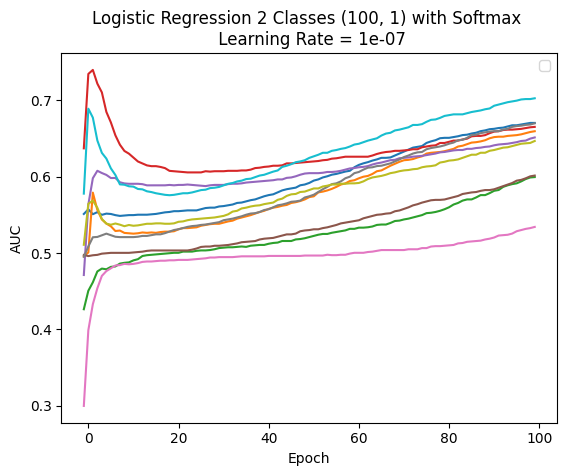


Test set: Avg. loss: 0.008507248777780474, AUC: 0.7367944425630055


Test set: Avg. loss: 0.008611208163433193, AUC: 0.739002156271836


Test set: Avg. loss: 0.008750129190290936, AUC: 0.7401831759354919


Test set: Avg. loss: 0.008920981276849782, AUC: 0.740328927908502


Test set: Avg. loss: 0.00911147994284304, AUC: 0.7399356119225113


Test set: Avg. loss: 0.009309929843768322, AUC: 0.7399956274408098


Test set: Avg. loss: 0.00950950939462792, AUC: 0.7390546698503471


Test set: Avg. loss: 0.009709260972143453, AUC: 0.7386184856370004


Test set: Avg. loss: 0.009908177344201761, AUC: 0.7381565804872403


Test set: Avg. loss: 0.010104036232452708, AUC: 0.7376775280465377


Test set: Avg. loss: 0.010296943518439189, AUC: 0.7372327701877199


Test set: Avg. loss: 0.01048857997910083, AUC: 0.7367880123289021


Test set: Avg. loss: 0.010678855281932508, AUC: 0.7379004428287885


Test set: Avg. loss: 0.010866609419354741, AUC: 0.7379261637652023


Test set: Avg. loss: 0.011050894640494


Test set: Avg. loss: 0.012963395187820213, AUC: 0.6574485688442298


Test set: Avg. loss: 0.013142908088415553, AUC: 0.6560371324585357


Test set: Avg. loss: 0.013333958868654619, AUC: 0.6571667102493645


Test set: Avg. loss: 0.013530754894943712, AUC: 0.6587924877718382


Test set: Avg. loss: 0.013728723269318448, AUC: 0.6588696505810789


Test set: Avg. loss: 0.013927275102824651, AUC: 0.6579115456996738


Test set: Avg. loss: 0.014127007182340444, AUC: 0.6595373232221474


Test set: Avg. loss: 0.014326695823274537, AUC: 0.6601192594085041


Test set: Avg. loss: 0.0145250437916189, AUC: 0.6586478075045118


Test set: Avg. loss: 0.014721892141654131, AUC: 0.6581687550638093


Test set: Avg. loss: 0.014915256026368704, AUC: 0.655097246573757


Test set: Avg. loss: 0.015104269635850105, AUC: 0.6525648060427054


Test set: Avg. loss: 0.0152882290676267, AUC: 0.6521029008929451


Test set: Avg. loss: 0.01546680458337377, AUC: 0.6500752337390097


Test set: Avg. loss: 0.0156407415496636


Test set: Avg. loss: 0.009663663789105464, AUC: 0.7351461592211701


Test set: Avg. loss: 0.00976527650410591, AUC: 0.7346413858440539


Test set: Avg. loss: 0.009864376692051226, AUC: 0.7346756804259387


Test set: Avg. loss: 0.009961020132029279, AUC: 0.7326394396265319


Test set: Avg. loss: 0.010055263096748179, AUC: 0.7326565869174744


Test set: Avg. loss: 0.010147189008029599, AUC: 0.7306117724725966


Test set: Avg. loss: 0.010236915841112472, AUC: 0.7280536110051312


Test set: Avg. loss: 0.010324568481919188, AUC: 0.7285926789641322


Test set: Avg. loss: 0.010410260956726706, AUC: 0.7280879055870161


Test set: Avg. loss: 0.010494062372369549, AUC: 0.7286269735460168


Test set: Avg. loss: 0.010576006788644732, AUC: 0.7270869324782551


Test set: Avg. loss: 0.010656095686412993, AUC: 0.7265735854556677


Test set: Avg. loss: 0.010734316231547922, AUC: 0.7240068503427314


Test set: Avg. loss: 0.010810664968707794, AUC: 0.7235106506110865


Test set: Avg. loss: 0.01088510092


Test set: Avg. loss: 0.04389203113058339, AUC: 0.503592357452427


Test set: Avg. loss: 0.04399878539407229, AUC: 0.5041142781204855


Test set: Avg. loss: 0.04410261150225843, AUC: 0.5041142781204855


Test set: Avg. loss: 0.04420364569432987, AUC: 0.5046361987885439


Test set: Avg. loss: 0.04430201236258876, AUC: 0.5051666931020735


Test set: Avg. loss: 0.04439781418004638, AUC: 0.5046533460794863


Test set: Avg. loss: 0.04449117356452389, AUC: 0.5046533460794863


Test set: Avg. loss: 0.04458223465313329, AUC: 0.5051752667475448


Test set: Avg. loss: 0.044671068527190085, AUC: 0.5051752667475448


Test set: Avg. loss: 0.044757728497680914, AUC: 0.5051752667475448


Test set: Avg. loss: 0.0448422974928072, AUC: 0.5051838403930159


Test set: Avg. loss: 0.04492480118082177, AUC: 0.5051838403930159


Test set: Avg. loss: 0.0450052415362056, AUC: 0.5057143347065456


Test set: Avg. loss: 0.0450836185589587, AUC: 0.5057143347065456


Test set: Avg. loss: 0.04515993817252402, AUC: 0.


Test set: Avg. loss: 0.02754121586896371, AUC: 0.509881126405542


Test set: Avg. loss: 0.027582393669934008, AUC: 0.5093677793829549


Test set: Avg. loss: 0.027622008669203606, AUC: 0.5093677793829549


Test set: Avg. loss: 0.027660096407430265, AUC: 0.5098897000510133


Test set: Avg. loss: 0.027696707233879136, AUC: 0.5104116207190718


Test set: Avg. loss: 0.027731873727486495, AUC: 0.5098982736964844


Test set: Avg. loss: 0.027765668944048832, AUC: 0.5104201943645428


Test set: Avg. loss: 0.027798125462502425, AUC: 0.5104201943645428


Test set: Avg. loss: 0.0278292975810744, AUC: 0.5104201943645428


Test set: Avg. loss: 0.027859198133891167, AUC: 0.5104201943645428


Test set: Avg. loss: 0.027887893266065767, AUC: 0.5104201943645428


Test set: Avg. loss: 0.027915395811724614, AUC: 0.5114640357006598


Test set: Avg. loss: 0.02794176006909483, AUC: 0.5114640357006598


Test set: Avg. loss: 0.02796702454055565, AUC: 0.5114640357006598


Test set: Avg. loss: 0.0279912139071194


Test set: Avg. loss: 0.03741319036385041, AUC: 0.5090259052697912


Test set: Avg. loss: 0.03741197408356282, AUC: 0.5090259052697912


Test set: Avg. loss: 0.03741013781624551, AUC: 0.5090259052697912


Test set: Avg. loss: 0.02297484652596231, AUC: 0.5814678509728944


Test set: Avg. loss: 0.023053746786176787, AUC: 0.5814678509728944


Test set: Avg. loss: 0.02309856947904788, AUC: 0.5814678509728944


Test set: Avg. loss: 0.023142237100541963, AUC: 0.5819897716409529


Test set: Avg. loss: 0.023184766433747412, AUC: 0.5819897716409529


Test set: Avg. loss: 0.023226204866207904, AUC: 0.5819897716409529


Test set: Avg. loss: 0.023266564244809357, AUC: 0.5819897716409529


Test set: Avg. loss: 0.02330587517400706, AUC: 0.5819897716409529


Test set: Avg. loss: 0.02334415246240841, AUC: 0.5814764246183657


Test set: Avg. loss: 0.02338143165067116, AUC: 0.5814764246183657


Test set: Avg. loss: 0.023417708789833337, AUC: 0.5809630775957784


Test set: Avg. loss: 0.023453006586426288


Test set: Avg. loss: 0.07228550407457056, AUC: 0.48850917165724284


Test set: Avg. loss: 0.0722701821021165, AUC: 0.48850917165724284


Test set: Avg. loss: 0.07225408613311578, AUC: 0.48850917165724284


Test set: Avg. loss: 0.07223725170822617, AUC: 0.48850917165724284


Test set: Avg. loss: 0.07221968277640965, AUC: 0.48850917165724284


Test set: Avg. loss: 0.07220139513351409, AUC: 0.48850917165724284


Test set: Avg. loss: 0.07218242037123528, AUC: 0.48850917165724284


Test set: Avg. loss: 0.07216277428542112, AUC: 0.48850917165724284


Test set: Avg. loss: 0.07214244897814764, AUC: 0.48850917165724284


Test set: Avg. loss: 0.07212149183695854, AUC: 0.4890310923253013


Test set: Avg. loss: 0.07209991470873973, AUC: 0.4890310923253013


Test set: Avg. loss: 0.0720777333893391, AUC: 0.4890310923253013


Test set: Avg. loss: 0.07205498341941438, AUC: 0.4890310923253013


Test set: Avg. loss: 0.07203165690104167, AUC: 0.4890310923253013


Test set: Avg. loss: 0.07200778542591671


Test set: Avg. loss: 0.019731523580926297, AUC: 0.6244003806698588


Test set: Avg. loss: 0.01983404060821849, AUC: 0.6238870336472716


Test set: Avg. loss: 0.01993417739868164, AUC: 0.6228774868930395


Test set: Avg. loss: 0.02003201885499816, AUC: 0.6218507928478649


Test set: Avg. loss: 0.02012763408400257, AUC: 0.6197974047575159


Test set: Avg. loss: 0.020221124771465673, AUC: 0.6197974047575159


Test set: Avg. loss: 0.02031256199870297, AUC: 0.6187707107123412


Test set: Avg. loss: 0.02040205238768773, AUC: 0.617752590312638


Test set: Avg. loss: 0.020489640364242143, AUC: 0.617752590312638


Test set: Avg. loss: 0.020575396022441225, AUC: 0.6172392432900506


Test set: Avg. loss: 0.020659358851904702, AUC: 0.6172478169355218


Test set: Avg. loss: 0.020741559457087864, AUC: 0.6167344699129347


Test set: Avg. loss: 0.020822050161736844, AUC: 0.6167344699129347


Test set: Avg. loss: 0.020900868480990393, AUC: 0.6151944288451727


Test set: Avg. loss: 0.02097806673859464,


Test set: Avg. loss: 0.029996743606978075, AUC: 0.5706189743347923


Test set: Avg. loss: 0.03010256986440339, AUC: 0.570105627312205


Test set: Avg. loss: 0.03020505628724029, AUC: 0.569600853935089


Test set: Avg. loss: 0.030304333191233886, AUC: 0.5690875069125017


Test set: Avg. loss: 0.03040053385385075, AUC: 0.5690875069125017


Test set: Avg. loss: 0.030493761935342666, AUC: 0.5690875069125017


Test set: Avg. loss: 0.030584178355910024, AUC: 0.5680608128673271


Test set: Avg. loss: 0.03067193218886729, AUC: 0.5685913071808567


Test set: Avg. loss: 0.03075719027785781, AUC: 0.5685913071808567


Test set: Avg. loss: 0.030840061219335836, AUC: 0.5691132278489152


Test set: Avg. loss: 0.03092069507385633, AUC: 0.5675731867811534


Test set: Avg. loss: 0.03099919056546861, AUC: 0.5670598397585661


Test set: Avg. loss: 0.031075651354424454, AUC: 0.5660331457133916


Test set: Avg. loss: 0.031150181100975654, AUC: 0.5665636400269213


Test set: Avg. loss: 0.03122288741433596, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.032773614176558656, AUC: 0.5568614884705901


Test set: Avg. loss: 0.03280480998890247, AUC: 0.5568614884705901



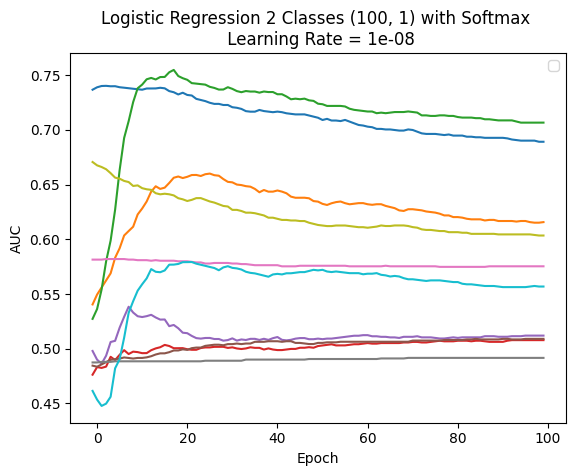

In [7]:
# SOFTMAX 2 CLASS RATIO 

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_softmax(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

In [ ]:
# SIGMOID 2 CLASS 

learning_rates = [0.1, 0.01, 0.0001, 0.00001, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_reduced,  network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

In [ ]:
# SOFTMAX 2 CLASS  

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_softmax(epoch, train_loader_reduced, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()